In [2]:
%load_ext autoreload
%autoreload 2
ticker = "TZA"

from deltahelper import get_delta
from load_db import handle_ticker, main, get_all_for_ticker_pd, get_date_ticker
table = get_delta()
delta_table = get_delta()
from imports import dt, START_DATE

:: loading settings :: url = jar:file:/Users/bowles/spark-3.3.1-bin-hadoop3/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/bowles/.ivy2/cache
The jars for the packages stored in: /Users/bowles/.ivy2/jars
io.delta#delta-core_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-cf111266-5e3f-46b3-aa93-474d8e333577;1.0
	confs: [default]
	found io.delta#delta-core_2.12;2.1.1 in central
	found io.delta#delta-storage;2.1.1 in central
	found org.antlr#antlr4-runtime;4.8 in central
	found org.codehaus.jackson#jackson-core-asl;1.9.13 in local-m2-cache
:: resolution report :: resolve 310ms :: artifacts dl 14ms
	:: modules in use:
	io.delta#delta-core_2.12;2.1.1 from central in [default]
	io.delta#delta-storage;2.1.1 from central in [default]
	org.antlr#antlr4-runtime;4.8 from central in [default]
	org.codehaus.jackson#jackson-core-asl;1.9.13 from local-m2-cache in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| s

22/12/22 22:13:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/22 22:13:20 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/12/22 22:13:20 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/12/22 22:13:20 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/12/22 22:13:20 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
22/12/22 22:13:20 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
22/12/22 22:13:20 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.
22/12/22 22:13:20 WARN Utils: Service 'SparkUI' could not bind on port 4046. Attempting port 4047.


<AxesSubplot: xlabel='Datetime'>

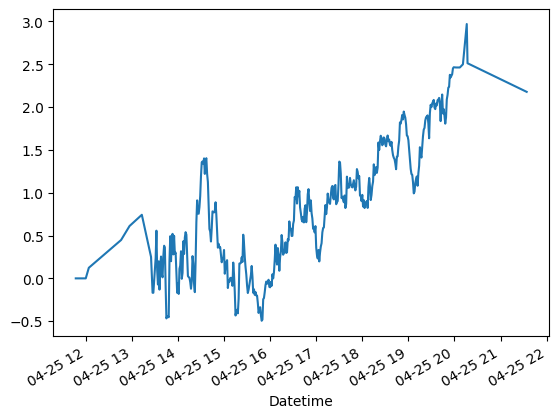

In [5]:
get_date_ticker("2022-04-25", "ADBE")['Close'].plot()

In [24]:
import backfill_morning


In [35]:
backfill_morning.backfill_opentime_forticker_date("ADBE", "2022-12-16", backfill_morning.get_days_dict(), checkfirst=True, verbose=True)

UTC Timestamp start date of 1671201000 for 2022-12-16
Getting Result at https://eodhistoricaldata.com/api/intraday/ADBE.US?api_token=635b4abf541968.71569979&interval=1m&from=1671201000&to=1671202800
Len Data before cleaning 31 : ADBE
In create cleaned df, found 1 records


100%|██████████| 1/1 [00:00<00:00, 100.21it/s]


Len Data after cleaning 30 : ADBE
Finished writing records


In [ ]:
from load_db import create_cleaned_df
import glob
def go():
    print("Save Results")
    from_vendor.to_csv(f"cache/{ticker}-{str(start)}-{str(end_date)}.csv")

    print("Clean Results")
    if len(from_vendor) > 0:
        final_df = create_cleaned_df(from_vendor)
        final_df['ticker'] = ticker
            

In [60]:
import glob
import pandas as pd
# dfs = [pd.read_csv(f) for f in glob.glob('cache/*')]
df = pd.read_csv(glob.glob('cache/*')[0])

In [61]:
df

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,1660560180,0,2022-08-15 10:43:00,150.4500,150.4500,150.4200,150.4200,348.0
1,1,1660564800,0,2022-08-15 12:00:00,150.5100,150.9426,150.4800,150.9400,2602.0
2,2,1660567260,0,2022-08-15 12:41:00,150.7400,150.7400,150.7400,150.7400,150.0
3,3,1660568220,0,2022-08-15 12:57:00,150.0198,150.0198,150.0198,150.0198,101.0
4,4,1660569900,0,2022-08-15 13:25:00,150.1000,150.1000,150.1000,150.1000,312.0
...,...,...,...,...,...,...,...,...,...
1191212,35449,1339016820,0,2012-06-06 21:07:00,58.6300,58.6300,58.6000,58.6000,200.0
1191213,35450,1339019040,0,2012-06-06 21:44:00,58.5200,58.5200,58.3000,58.3000,935.0
1191214,35451,1339020660,0,2012-06-06 22:11:00,58.3200,58.3200,58.3200,58.3200,300.0
1191215,35452,1339021740,0,2012-06-06 22:29:00,58.3200,58.3200,58.3200,58.3200,100.0


In [ ]:
for f in glob.glob('cache/*'):
    dates = set(

In [69]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [72]:
df.Datetime

0         2022-08-15 10:43:00
1         2022-08-15 12:00:00
2         2022-08-15 12:41:00
3         2022-08-15 12:57:00
4         2022-08-15 13:25:00
                  ...        
1191212   2012-06-06 21:07:00
1191213   2012-06-06 21:44:00
1191214   2012-06-06 22:11:00
1191215   2012-06-06 22:29:00
1191216   2012-06-06 23:47:00
Name: Datetime, Length: 1191217, dtype: datetime64[ns]

In [73]:
from backfill_morning import get_days_dict

In [74]:
get_days_dict()

{'2012-05-16': 1337175000,
 '2012-05-17': 1337261400,
 '2012-05-18': 1337347800,
 '2012-05-21': 1337607000,
 '2012-05-22': 1337693400,
 '2012-05-23': 1337779800,
 '2012-05-24': 1337866200,
 '2012-05-25': 1337952600,
 '2012-05-29': 1338298200,
 '2012-05-30': 1338384600,
 '2012-05-31': 1338471000,
 '2012-06-01': 1338557400,
 '2012-06-04': 1338816600,
 '2012-06-05': 1338903000,
 '2012-06-06': 1338989400,
 '2012-06-07': 1339075800,
 '2012-06-08': 1339162200,
 '2012-06-11': 1339421400,
 '2012-06-12': 1339507800,
 '2012-06-13': 1339594200,
 '2012-06-14': 1339680600,
 '2012-06-15': 1339767000,
 '2012-06-18': 1340026200,
 '2012-06-19': 1340112600,
 '2012-06-20': 1340199000,
 '2012-06-21': 1340285400,
 '2012-06-22': 1340371800,
 '2012-06-25': 1340631000,
 '2012-06-26': 1340717400,
 '2012-06-27': 1340803800,
 '2012-06-28': 1340890200,
 '2012-06-29': 1340976600,
 '2012-07-02': 1341235800,
 '2012-07-03': 1341322200,
 '2012-07-05': 1341495000,
 '2012-07-06': 1341581400,
 '2012-07-09': 1341840600,
 

In [82]:
from datetime import datetime
datetime.fromtimestamp(1660560180)

datetime.datetime(2022, 8, 15, 3, 43)

In [80]:
import time
datetime.fromtimestamp(time.time())

datetime.datetime(2022, 12, 18, 20, 40, 41, 624640)

In [81]:
df

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,1660560180,0,2022-08-15 10:43:00,150.4500,150.4500,150.4200,150.4200,348.0
1,1,1660564800,0,2022-08-15 12:00:00,150.5100,150.9426,150.4800,150.9400,2602.0
2,2,1660567260,0,2022-08-15 12:41:00,150.7400,150.7400,150.7400,150.7400,150.0
3,3,1660568220,0,2022-08-15 12:57:00,150.0198,150.0198,150.0198,150.0198,101.0
4,4,1660569900,0,2022-08-15 13:25:00,150.1000,150.1000,150.1000,150.1000,312.0
...,...,...,...,...,...,...,...,...,...
1191212,35449,1339016820,0,2012-06-06 21:07:00,58.6300,58.6300,58.6000,58.6000,200.0
1191213,35450,1339019040,0,2012-06-06 21:44:00,58.5200,58.5200,58.3000,58.3000,935.0
1191214,35451,1339020660,0,2012-06-06 22:11:00,58.3200,58.3200,58.3200,58.3200,300.0
1191215,35452,1339021740,0,2012-06-06 22:29:00,58.3200,58.3200,58.3200,58.3200,100.0


In [2]:
from backfill_morning import backfill_from_cache

In [3]:
backfill_from_cache()

Starting CSX


/Users/bowles/stocks/load_db.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Datetime'])
/Users/bowles/stocks/load_db.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Datetime'].apply(lambda x: str(x.date()))


Writing megadf morningg recods with len 11 dates of total dates 2666
Finished writing records
mega df is 100
mega df is 200
mega df is 300
mega df is 400
mega df is 500
mega df is 600
mega df is 700
mega df is 800
mega df is 900
mega df is 1000
mega df is 1100
mega df is 1200
mega df is 1300
mega df is 1400
mega df is 1500
mega df is 1600
mega df is 1700
mega df is 1800
mega df is 1900
mega df is 2000
mega df is 2100
mega df is 2200
mega df is 2300
mega df is 2400
mega df is 2500
mega df is 2600
Finished
Starting ED
mega df is 100
mega df is 200
mega df is 300
mega df is 400
mega df is 500
mega df is 600
mega df is 700
mega df is 800
mega df is 900
mega df is 1000
mega df is 1100
mega df is 1200
mega df is 1300
mega df is 1400
mega df is 1500
mega df is 1600
mega df is 1700
mega df is 1800
mega df is 1900
mega df is 2000
mega df is 2100
mega df is 2200
mega df is 2300
mega df is 2400
mega df is 2500
mega df is 2600
Finished
Starting HPE
mega df is 100
mega df is 200
mega df is 300
mega

KeyError: 'Datetime'

In [20]:
glob.glob('cache/*')[0:10][0].replace('cache/', '').split('-')[0]


'QCOM'